In [ ]:
!pip install pandas numpy scikit-learn nltk wordcloud

In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

Key words for each topic:
Topic #0: coin | gopay | transaksi | tokopedia | belanjakan | dpt
Topic #1: yg | lg | cashback | tokopedia | reward | produk
Topic #2: gopay | coins | gojek | tokopedia | aplikasi | membantu
Topic #3: beli | lumayan | uang | barang | aja | pulsa
Topic #4: gopay | ya | menambah | dapet | coin | meringankan
Topic #5: dibelanjakan | hadiah | berguna | sesuai | ulasan | pembeli
Topic #6: berbelanja | tokopedia | bermanfaat | toko | harga | utk
Topic #7: barang | membeli | produk | tokopedia | kebutuhan | pembelian
Topic #8: belanja | dipakai | utk | tokopedia | pakai | keperluan
Topic #9: belanja | lumayan | tokopedia | mudah | toped | biar


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


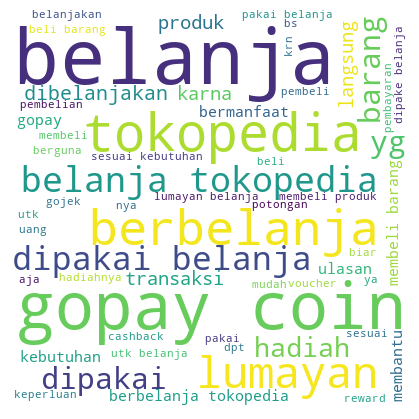


Dominant topic and percentage contribution for each document, ordered by highest percentage to lowest:

Topic 0:
Document 1918 - Topic Contribution: 92.50%
Karena gopay coin dpt digunakan untuk transaksi selain di tokopedia misalnya go ride, go car, go send.

Document 2479 - Topic Contribution: 92.50%
Gopay sudah menjadi pilihan utama dalam melakukan segala transaksi di Tokopedia termasuk pilihan utama dalam digital paymen saya sejak gopay hadir

Document 3172 - Topic Contribution: 91.00%
Karna motivasi utama saya untuk menang adalah reward dalam bentuk gopay yang bisa saya belanjakan semau saya

Document 2429 - Topic Contribution: 88.75%
Karena bisa sekali ditabung donggg, mengumpulkan receh receh lama lama menjadi bukitttt muahahaha

Document 2394 - Topic Contribution: 88.75%
Karena, seneng aja.. nanti klau dapat gopay coin bisa buat BELENJA lagi di Tokopedia

Document 1832 - Topic Contribution: 87.14%
Krn sy sllu dpt gopay coin

Document 222 - Topic Contribution: 87.14%
Krn itu pal

In [24]:
# Using xlsx from column A 'Text', make the data type 'String' due to the variance type on the sentences
data = pd.read_excel('practice7.xlsx')
text_data = data['Text'].astype(str).tolist()

#1 Import Indonesian languange from NLTK Library
stop_words = stopwords.words('Indonesian')

#2 Tokenize xlsx, convert to lower case, stored at tokenized_practice
tokenized_practice = [word_tokenize(text.lower()) for text in text_data]

#3 Remove stop word of sentence <= 1 from tokenized_date
filtered_practice = [[word for word in tokens if word not in stop_words and len(word) > 1 and not word.isdigit()] for tokens in tokenized_data]

#4 New list, gabungin semua kata di setiap text into a single string.
processed_data = [' '.join(tokens) for tokens in filtered_practice]

#5 Count the frequency from each word occurences
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(processed_data)

#6 Topic Modelling LDA (Latent Dirichlet Allocation), Create 10 Topic, each topic containts 6 key words
total_topics = 10
key_word_each_topic = 6
lda = LatentDirichletAllocation(n_components=total_topics, random_state=42)
lda.fit(doc_term_matrix)

#7 Print key words for each topic
def print_top_words(model, feature_names, key_word_each_topic):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx}: "
        message += " | ".join([feature_names[i]
                             for i in topic.argsort()[:-key_word_each_topic - 1:-1]])
        print(message)

print("Key words for each topic:")
print_top_words(lda, vectorizer.get_feature_names(), key_word_each_topic)

#8 Distribusi setiap topik dari setiap row/document 
topic_dist = lda.transform(doc_term_matrix)

#9 Kontribusi setiap document kepada setiap topik in percentage
dominant_topics = np.argmax(topic_dist, axis=1)
topic_percentages = np.max(topic_dist, axis=1) / np.sum(topic_dist, axis=1)

# Add the dominant topic and percentage contribution to the original dataframe
data['Dominant Topic'] = dominant_topics
data['Topic Contribution'] = topic_percentages

#10 Sort by highest contribution
sorted_data = data.sort_values(['Dominant Topic', 'Topic Contribution'], ascending=[True, False])
grouped_data = sorted_data.groupby(['Dominant Topic'])


#11 bit visualization using wordcloud (optional)
all_text = ' '.join(processed_data)
wordcloud = WordCloud(width=400, height=400, background_color='white', min_font_size=10).generate(all_text)
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


#12 Print
print("\nDominant topic and percentage contribution for each document, ordered by highest percentage to lowest:")
for topic, group in grouped_data:
    print(f"\nTopic {topic}:")
    for index, row in group.iterrows():
        print(f"Document {index} - Topic Contribution: {row['Topic Contribution']:.2%}\n{row['Text']}\n")